<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# $D^+$ decays: finding the $D^+$ meson mass! <a name="c"></a>

**The following analysis aims to search for events where the [$D^+$](https://en.wikipedia.org/wiki/D_meson) meson decays to three pions.**

The $D^+$ meson is composed of a $c$ quark and an $\bar{d}$ antiquark and the pion, $\pi^+$, is composed of a $u$ quark and an $\bar{d}$ antiquark (as we've seen in the Introduction to Particle Physics notebook). In this notebook we want to reconstruct the trajectories of our final state particles, our pions, in order to find the mass of the $D^+$ meson.

We will be dealing with a three-body decay, $D^+ \to \pi^- \pi^+ \pi^+$. In this process the electric charge must be conserved!

We've learned in the previous notebook about 4-vectors and we know how to manipulate them. You will see now why it was so important to learn about 4-vectors and what we can do with them in real life! We will look at the $D^+$ decay to three pions but firstly, we need to think about how we talk about decays in particle physcis.

**Contents:**
- [Decays](#1.)
- [The invariant mass calculation](#2.)
- [Cuts](#3.)
- [Find the $D^+$ meson!](#4.)

---

## Decays <a name="1."></a>

Let's start with understanding the idea of a decay process!

We want to find $D^+$ mesons, but they don't live long enough to actually see them with the detector itself. Instead, we have to **reconstruct** them from their decay products. We don't particularly mind where the $D^+$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $D^+$s.


From theory, we know that there are several decay routes as you can see in [here](https://pdglive.lbl.gov/Particle.action?init=0&node=S031&home=MXXX035) but today we are interested in the particular decay route $D^+ \to \pi^- \pi^+ \pi^+$.


In this process, a random $D^+$ emerges from the collision aftermath in the LHC (we don't care how) can decay directly to three pions. The decay happens at the vertex below, where the two arrows meet. We denote a pion by the letter $\pi^{+}$, and the antiparticle is $\pi^{-}$.

<figure>
    <center> <img src="images/DTopipipi.png" alt="TEST" style="width:40%" />
   <figcaption>Image 1: The $D^+$ decay directly from the proton-proton collision. </figcaption> </center>
</figure>

The LHCb detector can measure the momentum and energy of muons coming out of decays, and you can access that information quite simply. It also measures the charge and flavour of each particle.

We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. 

Instead, we use what is called a trigger. The trigger here was us seeing **exactly one high energy pion**, so all of our data will contain at least those events, as well as a bunch of other particles.


Next we have to open the data that we want to analyze. As described earlier, the data is stored in a *.root file. We can use a python library called uproot to access the data. Below is an example of how to open a *.root file using uproot

In [1]:
## data file
import uproot
f = uproot.open("../LHCb_data/D2PiPiPi/PPP_MagUpDown_allm2_TIS_runNumber_lessBranches_Sample2_SamePol_MVA_BDTG0p7_vetoKs.root")

We can inspect the contents of a file by using the method keys()

In [2]:
f.keys()

['DecayTree;9', 'DecayTree;8']

We see that we have an object called 'DecayTree'. We can obtain information about the object in the file and its type by using the method classnames()

In [3]:
f.classnames()

{'DecayTree;9': 'TTree', 'DecayTree;8': 'TTree'}

We see that the object called DecayTree is a TTree type. A TTree is simply columns of data stored in the .root format. Each column of data can represent a different physical quantity of a particle. For instance, its charge, energy, momentum etc.

Now we know what data the file contains, in future we can quickly access that data. We want to access the mini data. This can be done by executing the command below


In [4]:
events = uproot.open("../LHCb_data/D2PiPiPi/PPP_MagUpDown_allm2_TIS_runNumber_lessBranches_Sample2_SamePol_MVA_BDTG0p7_vetoKs.root:DecayTree")

Let's look at contents of the TTree. Essentially all the columns in the TTree called DecayTree

In [5]:
events.keys()

['totCandidates',
 'Polarity',
 'runNumber',
 'D_ID',
 'nTracks',
 'D_IP_OWNPV',
 'D_IPCHI2_OWNPV',
 'D_FD_OWNPV',
 'D_FDCHI2_OWNPV',
 'D_DIRA_OWNPV',
 'D_ENDVERTEX_CHI2',
 'D_P',
 'D_PT',
 'D_DOCA12',
 'D_DOCA13',
 'D_DOCA23',
 'D_MM',
 'PTsum',
 'logIP',
 'p3_IP_OWNPV',
 'p3_IPCHI2_OWNPV',
 'p3_P',
 'p3_PT',
 'p3_PIDK',
 'p3_LOKI_ETA',
 'p3_PX',
 'p3_PY',
 'p3_PZ',
 'p3_isMuon',
 'p2_IP_OWNPV',
 'p2_IPCHI2_OWNPV',
 'p2_P',
 'p2_PT',
 'p2_PIDK',
 'p2_LOKI_ETA',
 'p2_PX',
 'p2_PY',
 'p2_PZ',
 'p2_isMuon',
 'p1_IP_OWNPV',
 'p1_IPCHI2_OWNPV',
 'p1_P',
 'p1_PT',
 'p1_PIDK',
 'p1_LOKI_ETA',
 'p1_PX',
 'p1_PY',
 'p1_PZ',
 'p1_isMuon',
 'm3pi',
 's12_pipi_DTF',
 's13_pipi_DTF',
 's23_pipi_DTF',
 's12_pipi',
 's13_pipi',
 's23_pipi',
 'D_BPVTRGPOINTING',
 'D_L0Global_TOS',
 'D_L0Global_TIS',
 'D_L0HadronDecision_TOS',
 'D_L0HadronDecision_TIS',
 'D_L0MuonDecision_TOS',
 'D_L0MuonDecision_TIS',
 'D_L0ElectronDecision_TOS',
 'D_L0ElectronDecision_TIS',
 'D_L0PhotonDecision_TOS',
 'D_L0PhotonDec

We see lots of columns but the most important ones for us are the momentum components of each final state particle. We can use the .arrays method to access events with just the columns we specify.

We want to run over all the data and reconstruct the $D^+$ meson mass. To do this we will access events using the arrays method again. Let's look at doing this.

In [6]:
sel_events = events.arrays(["p1_PX","p1_PY","p1_PZ","p2_PX","p2_PY","p2_PZ","p3_PX","p3_PY","p3_PZ"])

First we define a histogram. To do this we can import the python hist library. Once we have done that we can define a histogram. Its name is hist and the x axis is named $m(\pi^-\pi^+\pi^+)$ (MeV). The three initial arguments indicate that this histogram contains 100 bins which fill the gap from 0 to 150000.


In [7]:
import hist
from hist import Hist

hist_mass = Hist(hist.axis.Regular(100,0,150000, label = "$m(\pi^-\pi^+\pi^+)$ (MeV)"))

It is now time to fill our above defined histogram with the masses. To do that, we need to reconstruct our $D^+$ meson invariant mass. 


[Return to contents](#c)

---

## The invariant mass calculation <a name="2."></a>

One very important quantity we need to define is the invariant mass! It is defined as an invariant quantity which is the same for all observers in all reference frames (that's why we call it *invariant*). To calculate it we use the energy, *E*, and momentum, *p*, both measured in the detector. To derive a proper expression for the invariat mass we ask that in the process both energy and momentum are conserved! 

* Energy conservation

$ E = E_{\pi^-} + E_{\pi^+} + E_{\pi^+} $

* Momentum conservation

$ \vec{p} = \vec{p}_{\pi^-} + \vec{p}_{\pi^+} + \vec{p}_{\pi^+} $

From special relativity we've learned the relation between mass, energy and momentum to be:

$ (pc)^2 + (mc^2)^2 = E^2 $

$ E^2 = p^2 + m^2$

Rearraging it to $m$:

$ m^2 = E^2 - p^2 = (E_{\pi^-} + E_{\pi^+} + E_{\pi^+})^2 - || p_{\pi^-} + p_{\pi^+} + p_{\pi^+} ||$

$ m^2 = (E_{\pi^-}+ E_{\pi^+} + E_{\pi^+})^2 - (\vec{p}_{\pi^-} + \vec{p}_{\pi^+} + \vec{p}_{\pi^+})\cdot (\vec{p}_{\pi^-} + \vec{p}_{\pi^+} + \vec{p}_{\pi^+})$

Since the dot product of two orthogonal vectors is zero, we can write more explicitly

$ m^2 = (E_{\pi^-} + E_{\pi^+} + E_{\pi^+})^2 - (p_{\pi^-_x} + p_{\pi^+_x} + p_{\pi^+_x} )^2 - (p_{\pi^-_y} + p_{\pi^+_y} + p_{\pi^+_y})^2 - (p_{\pi^-_z} + p_{\pi^+_z} + p_{\pi^+_z})^2$

<div class="alert alert-info"> Our goal is to calculte the invariant mass of the three chosen particles and if the mass is close to the $D^+$ mass, we save it to a histogram.</div> 

## Cuts <a name="3."></a>

Why do we make cuts? Remember that there are lots of other particles flying around, and sometimes you'll just have two particles of the same charge and same flavour, that have nothing to do with each other, that we measure. Obviously, they won't reconstruct to a $D^+$ meson.


### Make sure you read through the code - particularly the comments! You'll be doing this yourself shortly.

The $D^+$ meson decays to:
- $D^+ \rightarrow \pi^- \; \pi^+ \; \pi^+$

This means we can deduce the following for a *pass event*:
- There must be 3 pions produced by the event - see by observation
- The sum of the 3 pions charge has to be the same as the charge of the decaying particle $D^+$ 
- The final state particles are **not** muons

Let's open our LHCb data but now selecting only the events satisfying the criteria:

1. are **not** muons: `p1_isMuon==0` and `p2_isMuon==0` and `p3_isMuon==0` 

In [22]:
# Define preselection
preselection = "p1_isMuon==0 & p2_isMuon==0 & p3_isMuon==0"

events = uproot.open("../LHCb_data/D2PiPiPi/PPP_MagUpDown_allm2_TIS_runNumber_lessBranches_Sample2_SamePol_MVA_BDTG0p7_vetoKs.root:DecayTree",where=preselection)

In [23]:
# Extracting the momentum components and energy of the first muon
p1x = events["p1_PX"].array(library="np")
p1y = events["p1_PY"].array(library="np")
p1z = events["p1_PZ"].array(library="np")



Let's visualise one of these momentum components, for instance let's check the x-component of the pion! To do that we first define a histogram, and we fill it with the values we extracted in `p1x`.

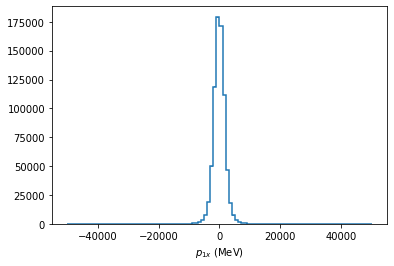

In [24]:
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np

# Defining histogram
hist_p1x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{1x}$ (MeV)"))

# Fiblling histogram with values of p1x
hist_p1x.fill(p1x)

# Plotting the histogram
hist_p1x.plot()
plt.show()

Great! Momentum is a **vector** quantity, it has x,y and z components. Now let's try to calculate the magnitude of the momentum, $p^{2} = p_{x}^{2} + p_{y}^{2} + p_{z}^{2}$, of the first kaon candidate and plot it into a histogram: 

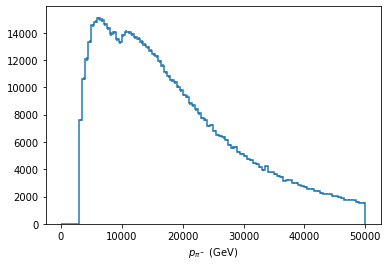

In [26]:
# Calulating the magnitude of the momentum:
p1 = np.sqrt( p1x**2 + p1y**2 + p1z**2)

# Defining histogram
hist_p1 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{\pi^-}$ (GeV)"))

# Filling histogram with values of p1x
hist_p1.fill(p1)

# Plotting the histogram
hist_p1.plot()
plt.show()

### Your turn!

We've calculated the magnitude of the momentum for the $\pi^-$. Repeat that now for the other pions, $\pi^+$!

The first step is to extract the momentum components. Then plot one of the components as an example, for instace the x-component. Finally, calculate and plot the magnitude of the momentum for the second and third pion.

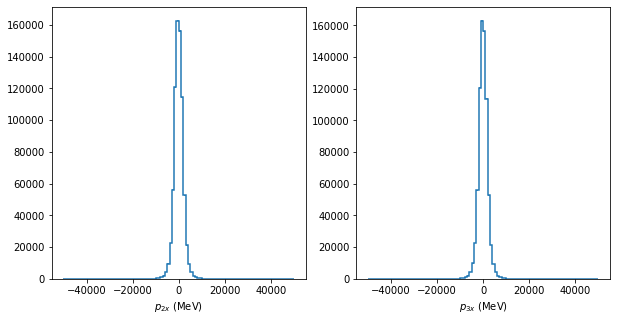

In [27]:
# Extracting the momentum components and energy of the second muon
p2x = events["p2_PX"].array(library="np")
p2y = events["p2_PY"].array(library="np")
p2z = events["p2_PZ"].array(library="np")

p3x = events["p3_PX"].array(library="np")
p3y = events["p3_PY"].array(library="np")
p3z = events["p3_PZ"].array(library="np")

# Defining histogram
hist_p2x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{2x}$ (MeV)"))
hist_p3x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{3x}$ (MeV)"))

# Filling histogram with values of p2x and p3x
hist_p2x.fill(p2x)
hist_p3x.fill(p3x)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_p2x.plot()
plt.subplot(1,2,2)
hist_p3x.plot()
plt.show()

plt.show()

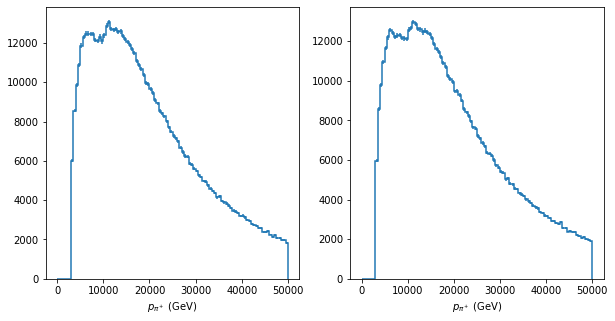

In [28]:
# Calulating the magnitude of the momentum
p2 = np.sqrt( p2x**2 + p2y**2 + p2z**2)
p3 = np.sqrt( p3x**2 + p3y**2 + p3z**2)

# Defining histogram
hist_p2 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{\pi^+}$ (GeV)"))
hist_p3 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{\pi^+}$ (GeV)"))


# Fiblling histogram with values of p1x
# ***Filling histogram with values of p1x***
hist_p2.fill(p2)
hist_p3.fill(p3)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_p2.plot()
plt.subplot(1,2,2)
hist_p3.plot()
plt.show()


<div class="alert alert-success">
Great Job!
</div>

## Calculating the energy distributions


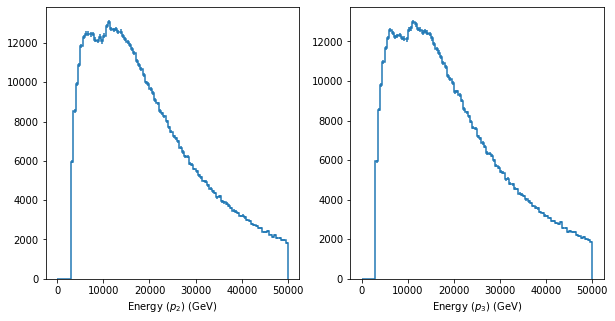

In [29]:
# Creating histograms for e2 and e3 (energy of the second and third particles)
hist_e1 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_1$) (GeV)"))
hist_e2 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_2$) (GeV)"))
hist_e3 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_3$) (GeV)"))

# Pion mass in MeV
m_pion = 139.57

# Calculating the momentum and filling the histogram
e1 = np.sqrt((p1*p1)+(m_pion*m_pion))
hist_e1.fill(e1)
e2 = np.sqrt((p2*p2)+(m_pion*m_pion))
hist_e2.fill(e2)
e3 = np.sqrt((p3*p3)+(m_pion*m_pion))
hist_e3.fill(e3)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_e2.plot()
plt.subplot(1,2,2)
hist_e3.plot()
plt.show()

## Find the $D^+$ meson! <a name="4."></a>

Now that we've learned how to obtain the momentum and energy, we are ready to reconstruct the invariant mass! After filling the histogram we want to see the results of the analysis.

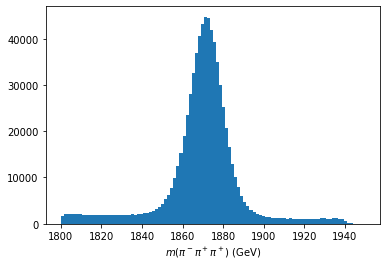

In [30]:
# Defining mass histogram
mass_distr = Hist(hist.axis.Regular(100,1800,1950, label = "$m(\pi^- \pi^+ \pi^+)$ (GeV)"))

# Calculating invariant mass
m = np.sqrt((e1 + e2 + e3)**2 - (p1x + p2x + p3x)**2 - (p1y + p2y + p3y)**2 - (p1z + p2z + p3z)**2)

# Filling histogram
mass_distr.fill(m)

# Plotting histogram
mass_distr.plot(histtype = "fill")
plt.show()

<div class="alert alert-success">
Great Job! If everything went well, you have just reconstructed the $D^+$ meson!
</div>

*Interpret this graph - what is the mass of this meson?*

<details>
    <summary>Answer: </summary>
        That's right, around 1866 GeV!
</details>

If you want to double check you result, there is already one column in our data file which is exactly the invariant mass distribution. If you've done if correctly, your plot should look like the following result:

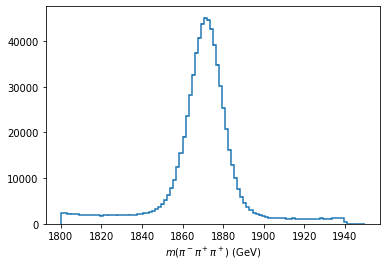

In [31]:
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np

dmm = events["D_MM"].array(library="np") 

# Defining histogram
hist_dmm = Hist(hist.axis.Regular(100,1800,1950, label = "$m(\pi^- \pi^+ \pi^+)$ (GeV)"))

# Filling histogram with values of the invariant mass
hist_dmm.fill(dmm)

# Plotting the histogram
hist_dmm.plot()
plt.show()

[Return to contents](#c)

---